In [1]:
import os
import subprocess

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)


from collections import Counter
#import regex as regex

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
pandas 1.2.1
numpy 1.19.2
matplotlib 3.3.2
scipy 1.5.2
seaborn 0.11.1


In [2]:
samples_data = pd.read_csv('sample_datasheet_demultiplexed.csv', sep=',', index_col=0)
samples_data

,Locus,Type,Fragment,Timepoint,Position_DMS,PE1_index,RC_for_index,RC_rev_index,PE2_index,filepath
Sample_ID,,,,,,,,,,
8,FCY1,mat_a,1,FC4,1,2,5,12,3,./demultiplexed_reads/8_indexes_2_3_5_12
9,FCY1,mat_a,1,FC4,2,2,6,12,3,./demultiplexed_reads/9_indexes_2_3_6_12
10,FCY1,mat_a,1,FC4,3,2,7,12,3,./demultiplexed_reads/10_indexes_2_3_7_12
11,FCY1,mat_alpha,1,FC4,1,2,8,12,3,./demultiplexed_reads/11_indexes_2_3_8_12
12,FCY1,mat_alpha,1,FC4,2,2,9,12,3,./demultiplexed_reads/12_indexes_2_3_9_12
13,FCY1,mat_alpha,1,FC4,3,2,10,12,3,./demultiplexed_reads/13_indexes_2_3_10_12
14,FCY1,mat_a,2,FC4,1,2,5,13,3,./demultiplexed_reads/14_indexes_2_3_5_13
15,FCY1,mat_a,2,FC4,2,2,6,13,3,./demultiplexed_reads/15_indexes_2_3_6_13
16,FCY1,mat_a,2,FC4,3,2,7,13,3,./demultiplexed_reads/16_indexes_2_3_7_13


In [3]:
def get_sample_read_count(Sample_ID):
    
    
    variant_fraction_df = pd.read_csv('./read_abundances/'+str(Sample_ID)+'_read_frac.csv', index_col=0)
    
    return np.float64(variant_fraction_df.index.name)
    
get_sample_read_count(9)

72827.0

In [4]:
read_count = {}

for Sample_ID in list(samples_data.index):
    
    read_count[Sample_ID] = get_sample_read_count(Sample_ID)
    
samples_data['read_count'] = pd.Series(read_count)
samples_data

,Locus,Type,Fragment,Timepoint,Position_DMS,PE1_index,RC_for_index,RC_rev_index,PE2_index,filepath,read_count
Sample_ID,,,,,,,,,,,
8,FCY1,mat_a,1,FC4,1,2,5,12,3,./demultiplexed_reads/8_indexes_2_3_5_12,126811.0
9,FCY1,mat_a,1,FC4,2,2,6,12,3,./demultiplexed_reads/9_indexes_2_3_6_12,72827.0
10,FCY1,mat_a,1,FC4,3,2,7,12,3,./demultiplexed_reads/10_indexes_2_3_7_12,122522.0
11,FCY1,mat_alpha,1,FC4,1,2,8,12,3,./demultiplexed_reads/11_indexes_2_3_8_12,112246.0
12,FCY1,mat_alpha,1,FC4,2,2,9,12,3,./demultiplexed_reads/12_indexes_2_3_9_12,67561.0
13,FCY1,mat_alpha,1,FC4,3,2,10,12,3,./demultiplexed_reads/13_indexes_2_3_10_12,132270.0
14,FCY1,mat_a,2,FC4,1,2,5,13,3,./demultiplexed_reads/14_indexes_2_3_5_13,112513.0
15,FCY1,mat_a,2,FC4,2,2,6,13,3,./demultiplexed_reads/15_indexes_2_3_6_13,60086.0
16,FCY1,mat_a,2,FC4,3,2,7,13,3,./demultiplexed_reads/16_indexes_2_3_7_13,150675.0


In [5]:
bar_pos = [1,2,3,5,6,7,10,11,12,14,15,16,19,20,21,23,24,25]
len(bar_pos)

labels = []

for Sample_ID in list(samples_data.index):
    
    label = r'F'+str(samples_data.loc[Sample_ID]['Fragment'])+r'_'
    label += (samples_data.loc[Sample_ID]['Type']).replace('mat_', '')
    label += r'_'+str(samples_data.loc[Sample_ID]['Position_DMS'])
    labels.append(label)
    
labels

['F1_a_1',
 'F1_a_2',
 'F1_a_3',
 'F1_alpha_1',
 'F1_alpha_2',
 'F1_alpha_3',
 'F2_a_1',
 'F2_a_2',
 'F2_a_3',
 'F2_alpha_1',
 'F2_alpha_2',
 'F2_alpha_3',
 'F3_a_1',
 'F3_a_2',
 'F3_a_3',
 'F3_alpha_1',
 'F3_alpha_2',
 'F3_alpha_3']

Text(0.5, 0, 'Library')

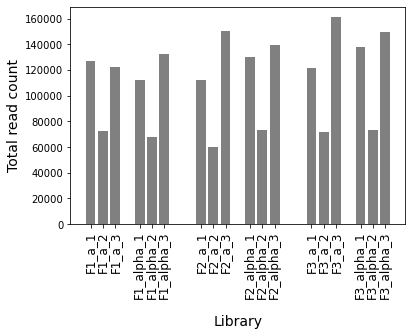

In [6]:
plt.bar(x = bar_pos, height= list(samples_data['read_count']), color='grey')
plt.xticks(bar_pos, labels, fontsize=12, rotation=90)
plt.ylabel('Total read count', fontsize=14)
plt.xlabel('Library', labelpad=16, fontsize=14)


In [7]:
def get_sample_codon_df(Sample_ID):

    variant_fraction_df = pd.read_csv('./read_abundances/'+str(Sample_ID)+'_read_frac.csv', index_col=0)
    
    #total_read_count = np.float64(variant_fraction_df.index.name)
    
    #no_reads_frac = (1+0.25)/total_read_count
    
    #variant_fraction_df = variant_fraction_df.mask(variant_fraction_df <no_reads_frac)
    
    return variant_fraction_df
    
test_F2_a_R1 = get_sample_codon_df(14)
test_F2_a_R3 = get_sample_codon_df(16)



## Import pre-treatment codon abundances

In [8]:
mat_a_1 = pd.read_csv("./KI_codon_abundances/mat_a_1.csv", index_col=0)
mat_a_2 = pd.read_csv("./KI_codon_abundances/mat_a_2.csv", index_col=0)
mat_a_3 = pd.read_csv("./KI_codon_abundances/mat_a_3.csv", index_col=0)

mat_alpha_1 = pd.read_csv("./KI_codon_abundances/mat_alpha_1.csv", index_col=0)
mat_alpha_2 = pd.read_csv("./KI_codon_abundances/mat_alpha_2.csv", index_col=0)
mat_alpha_3 = pd.read_csv("./KI_codon_abundances/mat_alpha_3.csv", index_col=0)



In [9]:
def get_ref_codon_df(ref):

    
    
    total_read_count = np.float64(ref.index.name)
    
    no_reads_frac = (21+0.25)/total_read_count
    
    ref_mask_df = ref.mask(ref <no_reads_frac)
    
    return ref_mask_df

get_ref_codon_df(mat_a_1)

,2,3,4,5,6,7,8,9,10,11,...,58,59,60,61,62,63,64,65,66,67
333556.0,,,,,,,,,,,,,,,,,,,,,
GTT,NaN,0.000201,0.000327,0.000246,0.000249,0.000324,0.000177,0.000312,0.000198,0.000435,...,0.000234,0.000288,0.000300,0.000279,0.000276,0.000267,0.000345,0.000171,0.000306,0.000375
GTG,0.000456,0.000207,0.000294,0.000315,0.000267,0.000156,0.000240,0.000183,0.000312,0.000573,...,0.000318,0.000417,0.000276,0.000261,0.000243,0.000339,0.000501,0.000114,0.000228,0.000417
TTC,0.000393,0.000378,0.000243,0.000384,0.000243,0.000186,0.000273,0.000246,0.000192,0.000189,...,0.000132,0.000267,0.000168,0.000306,0.000402,0.000333,NaN,0.000087,0.000261,0.000279
GGG,0.000363,0.000192,0.000225,0.000369,0.000309,0.000594,0.000261,0.000654,0.000387,0.000920,...,0.000303,0.000456,0.000357,0.000132,0.000201,0.000330,0.000498,0.000249,0.000342,0.000345
TGC,0.000354,0.000324,0.000288,0.000429,0.000273,0.000168,0.000081,0.000222,0.000288,0.000192,...,0.000174,0.000234,0.000192,0.000228,0.000279,0.000279,0.000210,0.000072,0.000231,0.000285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAA,0.000135,0.000210,0.000162,0.000201,0.000171,0.000135,NaN,0.000285,0.000081,0.000096,...,0.000084,0.000165,0.000156,0.000111,0.000189,0.000192,0.000165,NaN,NaN,0.000189
CCT,0.000129,0.000231,0.000234,0.000336,0.000213,0.000180,0.000216,0.000180,0.000147,0.000135,...,0.000210,0.000078,0.000138,0.000237,0.000351,0.000162,0.000072,0.000075,0.000192,0.000297
CCC,0.000132,0.000348,0.000228,0.000387,NaN,0.000105,0.000135,0.000168,0.000141,NaN,...,0.000066,0.000138,0.000090,0.000132,0.000255,0.000144,0.000075,NaN,0.000114,0.000156


In [10]:
ref_dict = { ("mat_a",1):mat_a_1,
             ("mat_a",2):mat_a_2,
             ("mat_a",3):mat_a_3,
            
             ("mat_alpha",1):mat_alpha_1,
             ("mat_alpha",2):mat_alpha_2,
             ("mat_alpha",3):mat_alpha_3,       
           }


def get_log2_fold_change(Sample_ID):
    
    variant_fraction_df = get_sample_codon_df(Sample_ID)
    
    mating_type, fragment = samples_data.loc[Sample_ID]['Type'], samples_data.loc[Sample_ID]['Fragment']
    
    ref_df = get_ref_codon_df(ref_dict[(mating_type, fragment)])
    
    delta = np.log2(variant_fraction_df)-np.log2(ref_df)
    
    
    return delta
    
    
test = get_log2_fold_change(9)
test

,2,3,4,5,6,7,8,9,10,11,...,58,59,60,61,62,63,64,65,66,67
AAA,-3.585976,-3.994441,-3.637506,-2.974541,-3.781896,-2.662597,-2.419326,NaN,0.972991,-2.892079,...,-2.611971,-2.611971,-2.662597,-3.090019,1.062933,2.152315,1.403189,NaN,-2.264048,0.799455
AAC,-3.781896,-3.505056,-3.585976,-4.033435,NaN,-3.389579,-3.196934,-2.162168,NaN,-3.162168,...,-2.711507,NaN,-1.933899,-0.942120,1.715391,-1.359205,-1.219654,2.092290,-2.711507,NaN
AAG,-3.687259,-3.419326,-3.804616,-4.804616,-2.585976,-3.758813,-3.230881,-3.611971,-3.052544,-1.908953,...,-3.052544,-0.126544,0.941627,-3.126544,2.864559,2.109654,2.102274,NaN,-0.774243,0.951458
AAT,-2.758813,-4.144466,-3.448473,-4.071403,-0.191639,-3.781896,-3.687259,-3.994441,-1.505056,-3.296469,...,-3.014070,-2.389579,-1.505056,-3.933899,1.344527,-2.849010,2.745581,2.133983,-3.448473,0.662889
ACA,-3.781896,-2.687259,-3.359205,-3.735354,-3.448473,-3.359205,-3.781896,-1.219654,-3.162168,-0.264048,...,-3.126544,-3.090019,-2.711507,-3.090019,1.926895,-2.230881,1.479177,NaN,-2.849010,-3.419326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGT,-4.585976,-4.662597,NaN,-4.964488,-1.234604,-4.964488,-4.462828,-4.881432,-2.041656,0.091047,...,-4.433973,-4.196934,-4.505056,-4.419326,1.823415,-3.214007,2.512866,-0.611971,-4.624795,-2.758813
TTA,-4.090019,-4.343775,-2.645919,-4.859899,-3.532537,-3.849010,-2.849010,-4.328178,-0.840240,-3.126544,...,0.688424,-3.870706,-1.913141,-4.280350,1.490840,1.633505,1.476565,-2.662597,0.355848,-4.144466
TTC,-4.838039,-4.781896,-4.144466,-4.804616,-4.144466,-3.758813,-1.990483,-1.354813,-3.804616,-3.781896,...,1.905877,-0.695387,-2.027009,-4.477042,1.258577,2.355164,NaN,-2.662597,-0.340669,1.048542
TTG,-4.650106,-3.954363,-4.572801,-4.881432,-4.793301,-4.462828,-4.033435,-4.033435,-3.343775,-5.023785,...,-2.913141,-2.084724,-4.359205,-4.781896,1.320915,1.610421,1.967973,NaN,-4.280350,-4.984525


In [11]:
codon_order = list(test.index)


Text(0.5, 78.0, 'Position')

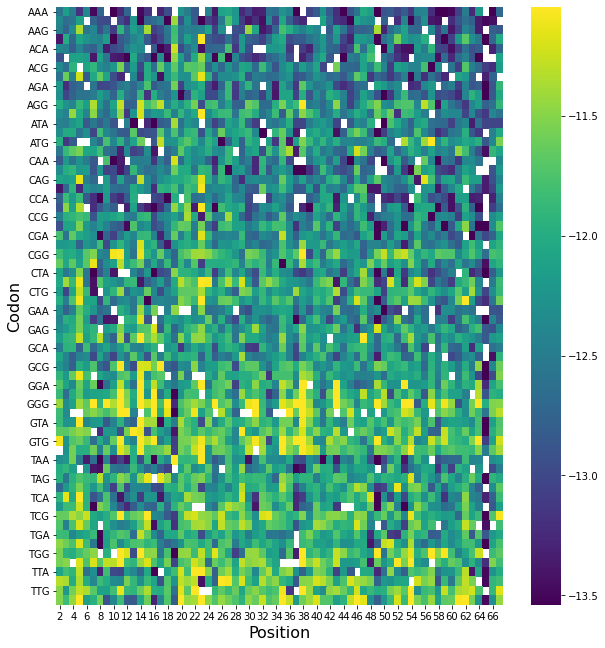

In [12]:
plt.figure(figsize=(10,11))


sns.heatmap(np.log2(get_ref_codon_df(mat_a_1).loc[codon_order]), cmap='viridis', robust=True)
plt.ylabel('Codon', fontsize=16)
plt.xlabel('Position', fontsize=16)

In [13]:
np.log2(4)-np.log2(np.NaN)

nan

In [14]:
test.loc['GTT'][2]

-4.572800653869818

Text(0.5, 78.0, 'Position')

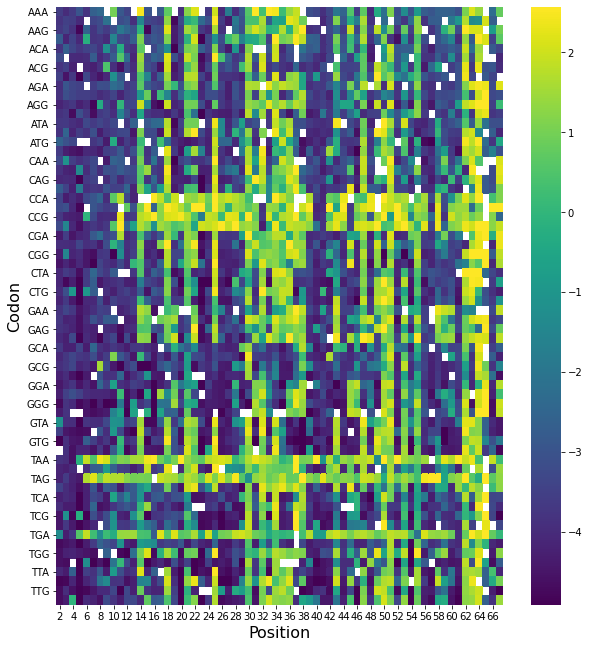

In [15]:
plt.figure(figsize=(10,11))


sns.heatmap(test, cmap='viridis', robust=True)
plt.ylabel('Codon', fontsize=16)
plt.xlabel('Position', fontsize=16)

In [16]:
ref_seq = "ATGGTTACCGGTGGTATGGCTTCTAAATGGGACCAAAAAGGTATGGACATTGCTTACGAAGAAGCTGCTTTGGGTTACAAGGAAGGTGGTGTTCCAATCGGTGGTTGTTT"\
          "GATCAACAACAAGGATGGTTCCGTCTTAGGTAGAGGTCACAACATGAGATTCCAAAAGGGTTCTGCCACTCTACATGGCGAAATCTCTACTTTGGAAAACTGTGGTAGAT"\
          "TGGAAGGTAAGGTCTATAAGGACACCACCTTGTACACTACTTTGTCACCATGCGACATGTGTACTGGTGCCATTATTATGTACGGTATCCCAAGATGTGTCGTCGGTGAA"\
          "AATGTTAACTTCAAGTCCAAGGGTGAAAAGTACTTGCAAACCAGAGGTCACGAAGTTGTTGTCGTTGATGACGAAAGATGTAAGAAGATCATGAAGCAATTTATTGATGA"\
          "ACGTCCACAAGACTGGTTCGAAGATATTGGTGAA"

# wt codon optmized FCY1 coding sequence

dict_of_wt = {}
# container that will stor position : codon information 

for codon in range(0,157):
    # loop through FCY1 positions
    
    pos_1 = ((codon+1)*3)
    pos_2 = ((codon+1)*3)+1
    pos_3 = ((codon+1)*3)+2   
    wt = ref_seq[pos_1]+ref_seq[pos_2]+ref_seq[pos_3]
    # get codon
    
    dict_of_wt[(codon+2)] = wt
    # add to dict
    
print(dict_of_wt)
#now we have the whole thing in one place

{2: 'GTT', 3: 'ACC', 4: 'GGT', 5: 'GGT', 6: 'ATG', 7: 'GCT', 8: 'TCT', 9: 'AAA', 10: 'TGG', 11: 'GAC', 12: 'CAA', 13: 'AAA', 14: 'GGT', 15: 'ATG', 16: 'GAC', 17: 'ATT', 18: 'GCT', 19: 'TAC', 20: 'GAA', 21: 'GAA', 22: 'GCT', 23: 'GCT', 24: 'TTG', 25: 'GGT', 26: 'TAC', 27: 'AAG', 28: 'GAA', 29: 'GGT', 30: 'GGT', 31: 'GTT', 32: 'CCA', 33: 'ATC', 34: 'GGT', 35: 'GGT', 36: 'TGT', 37: 'TTG', 38: 'ATC', 39: 'AAC', 40: 'AAC', 41: 'AAG', 42: 'GAT', 43: 'GGT', 44: 'TCC', 45: 'GTC', 46: 'TTA', 47: 'GGT', 48: 'AGA', 49: 'GGT', 50: 'CAC', 51: 'AAC', 52: 'ATG', 53: 'AGA', 54: 'TTC', 55: 'CAA', 56: 'AAG', 57: 'GGT', 58: 'TCT', 59: 'GCC', 60: 'ACT', 61: 'CTA', 62: 'CAT', 63: 'GGC', 64: 'GAA', 65: 'ATC', 66: 'TCT', 67: 'ACT', 68: 'TTG', 69: 'GAA', 70: 'AAC', 71: 'TGT', 72: 'GGT', 73: 'AGA', 74: 'TTG', 75: 'GAA', 76: 'GGT', 77: 'AAG', 78: 'GTC', 79: 'TAT', 80: 'AAG', 81: 'GAC', 82: 'ACC', 83: 'ACC', 84: 'TTG', 85: 'TAC', 86: 'ACT', 87: 'ACT', 88: 'TTG', 89: 'TCA', 90: 'CCA', 91: 'TGC', 92: 'GAC', 93: 'A

In [17]:
codontable_standard = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    }
# standard genetic code

wt_aa_dict={}
# container that will store FCY1 position : amino acid information

for codon in list(dict_of_wt.keys()):
    # loop thourhg FCY1 position
    
    wt_aa_dict[codon] = codontable_standard[dict_of_wt[codon]]
    # convert wt codon to aa and add to dict


In [18]:
codon_order = list(test.index)

In [19]:
codon_series_dict={}
# container for FCY1 position in the DataFrame
wt_codon_dict_series = {}
# container for wt codons in the Dataframe
wt_series_dict={}
# container for wt aa in the DataFrame
measured_series_dict={}
# container for dms codon mutant in the DataFrame
measured_aa_series_dict = {}
# container for aa codon mutant in the DataFrame


index_val=0
# counter for index value

for x in range(2,159):
    # for positions in FCY1
    
    for y in range(0,64):
        # for mutant in aa order
        
        codon_series_dict[index_val] = x
        # store FCY1 position
        wt_codon_dict_series[index_val] = dict_of_wt[x]
        # store FCY1 wt codon
        wt_series_dict[index_val] = wt_aa_dict[x]
        # store wt aa
        measured_series_dict[index_val] = codon_order[y]
        # store measured mutant
        measured_aa_series_dict[index_val] = codontable_standard[codon_order[y]]
        
        index_val+=1
        # increment index
        

print(len(codon_series_dict), len(wt_series_dict), len(measured_series_dict), len(measured_aa_series_dict))

long_form_df = pd.DataFrame([pd.Series(codon_series_dict, name='codon'), pd.Series(wt_codon_dict_series, name='wt_codon') , pd.Series(wt_series_dict, name='wt_aa'), pd.Series(measured_series_dict, name='measured_codon'), pd.Series(measured_aa_series_dict, name='measured_aa')]).T
# make df

10048 10048 10048 10048


In [20]:
long_form_df

,codon,wt_codon,wt_aa,measured_codon,measured_aa
0,2,GTT,V,AAA,K
1,2,GTT,V,AAC,N
2,2,GTT,V,AAG,K
3,2,GTT,V,AAT,N
4,2,GTT,V,ACA,T
...,...,...,...,...,...
10043,158,GAA,E,TGT,C
10044,158,GAA,E,TTA,L
10045,158,GAA,E,TTC,F
10046,158,GAA,E,TTG,L


In [21]:
'_'.join([str(x) for x in list(samples_data.loc[9][['Type', 'Fragment', 'Position_DMS']])])

'mat_a_1_2'

In [22]:
def get_vals_series(Sample_ID):
    # convert a codon x position df of log2 fold-change values into a series that can be added as
    # a column to the long form DataFrame. Takes the Sample_ID
    
    df = get_log2_fold_change(Sample_ID)
    
    s_name = '_'.join([str(x) for x in list(samples_data.loc[Sample_ID][['Type', 'Fragment', 'Position_DMS']])])
        
    codon_range = list(df.columns)
    # detected aa
    
    col = {}
    # empty container for the col
    
    index_val = 0
    # counter for the index 
    
    for x in range(2,159):    
        for y in range(0,64):
            # loop through FCY1 positions and aa
            
            if str(x) in codon_range:
                col[index_val] = df.loc[codon_order[y]][str(x)]
                # if the FCY1 position is in the df, store the value
                # associated with the mutant
                
            else:
                col[index_val] = np.nan
                # if not, mark as empty
                
            index_val +=1
            # increment index
            
            
    series = pd.Series(col, name=s_name)
    # convert to series and name
                
    return series


test_mat_a_1_1 = get_vals_series(9)
test_mat_a_1_1.name

'mat_a_1_2'

In [23]:
for Sample_ID in list(samples_data.index):
    
    series = get_vals_series(Sample_ID)
    
    long_form_df[series.name]=series

In [24]:
long_form_df

,codon,wt_codon,wt_aa,measured_codon,measured_aa,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_alpha_1_1,mat_alpha_1_2,...,mat_a_2_3,mat_alpha_2_1,mat_alpha_2_2,mat_alpha_2_3,mat_a_3_1,mat_a_3_2,mat_a_3_3,mat_alpha_3_1,mat_alpha_3_2,mat_alpha_3_3
0,2,GTT,V,AAA,K,-4.386111,-3.585976,-4.336472,-3.454503,-2.722102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,GTT,V,AAC,N,-4.582031,-3.781896,-4.532392,-3.592007,-2.859605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,GTT,V,AAG,K,-4.487394,-3.687259,-4.437755,-3.833015,-3.100613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,GTT,V,AAT,N,-3.558947,-2.758813,-3.509308,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,GTT,V,ACA,T,-4.582031,-3.781896,-4.532392,-4.162322,-3.429921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,158,GAA,E,TGT,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-5.332462,-4.577844,-5.738672,-5.639925,-4.726200,-5.752040
10044,158,GAA,E,TTA,L,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-4.894776,-4.140158,-5.300985,-5.369071,-4.455346,-4.481186
10045,158,GAA,E,TTC,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-5.160851,-4.406233,-5.567060,-5.460219,-4.546494,-5.572334
10046,158,GAA,E,TTG,L,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.162152,-0.288889,-0.412242,-4.532010,-4.618285,-5.644124


Text(0, 0.5, 'R2 log2 fold_change')

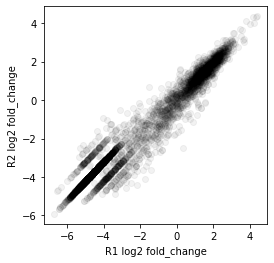

In [25]:
plt.figure(figsize=(4,4))

plt.scatter(long_form_df['mat_a_1_1'], long_form_df['mat_a_1_2'], color='k', alpha=0.05)

stats.spearmanr(long_form_df['mat_a_1_1'], long_form_df['mat_a_1_2'], nan_policy='omit')

plt.xlabel('R1 log2 fold_change')
plt.ylabel('R2 log2 fold_change')

In [26]:
plot_col = [(1,2), (1,3), (2,3)]

plot_row = [1,2,3]

plot_list = [(x,y) for x in plot_row for y in plot_col]

plot_list

[(1, (1, 2)),
 (1, (1, 3)),
 (1, (2, 3)),
 (2, (1, 2)),
 (2, (1, 3)),
 (2, (2, 3)),
 (3, (1, 2)),
 (3, (1, 3)),
 (3, (2, 3))]

4042
4042
4042
3809
3809
3809
3908
3908
3908


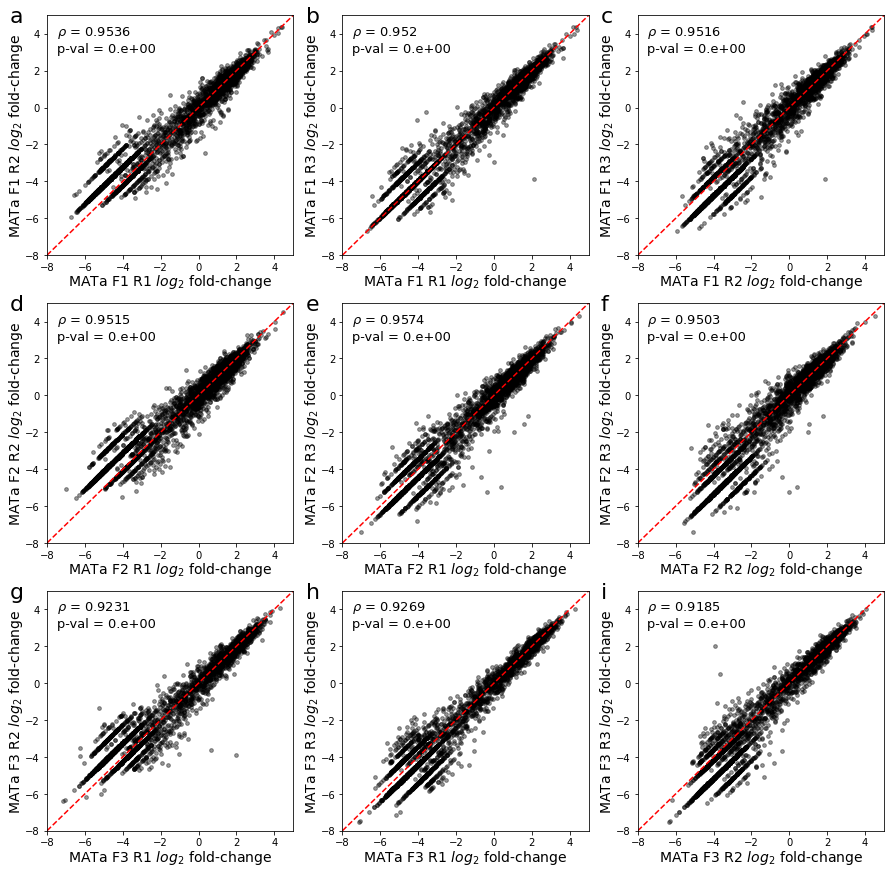

In [27]:

plot_index = 1

plt.figure(figsize=(15,15))

element_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
           
for pair in plot_list:
    
    ax = plt.subplot(int('33'+str(plot_index)))
    
    sample_1 = 'mat_a_'+str(pair[0])+str('_')+str(pair[1][0])
    sample_2 = 'mat_a_'+str(pair[0])+str('_')+str(pair[1][1])
    
    
    ax.scatter(long_form_df[sample_1], long_form_df[sample_2], color='k', alpha=0.4, s=14.0)
    
    plt.xlabel('MATa F'+str(pair[0])+' R' + str(pair[1][0]) + r' $log_{2}$ fold-change', fontsize=14, labelpad=0.1)
    plt.ylabel('MATa F'+str(pair[0])+' R' + str(pair[1][1]) + r' $log_{2}$ fold-change', fontsize=14, labelpad=0.1)

   
    ax.set_xlim(-8,5)
    ax.set_ylim(-8,5)
        
    plt.text(-0.15, 0.97, element_list[plot_index-1], transform=ax.transAxes, fontsize=22)

    
    
    plt.plot(range(-8,6), range(-8,6), 'r--')
        
    corr, pval = stats.spearmanr(long_form_df[sample_1], long_form_df[sample_2], nan_policy='omit')
    print(len([ x for x in range(0, len(long_form_df[sample_1].to_numpy().flatten())) if np.isnan(long_form_df[sample_2].to_numpy().flatten()[x]) == False and np.isnan(long_form_df[sample_2].to_numpy().flatten()[x])== False]))
    plt.text(-7.5,3, r'$\rho$'+' = '+ str(round(corr,4))+ '\np-val = '+str(np.format_float_scientific(pval, precision=3)), fontsize=13)
    #plt.text(-10.5, 7, plot_title[key], fontsize=20)
           
    plot_index+=1

plt.savefig('./figures/codon_level_corr_mata.svg', format='svg', dpi=300)

4000
4000
4000
3825
3825
3825
3919
3919
3919


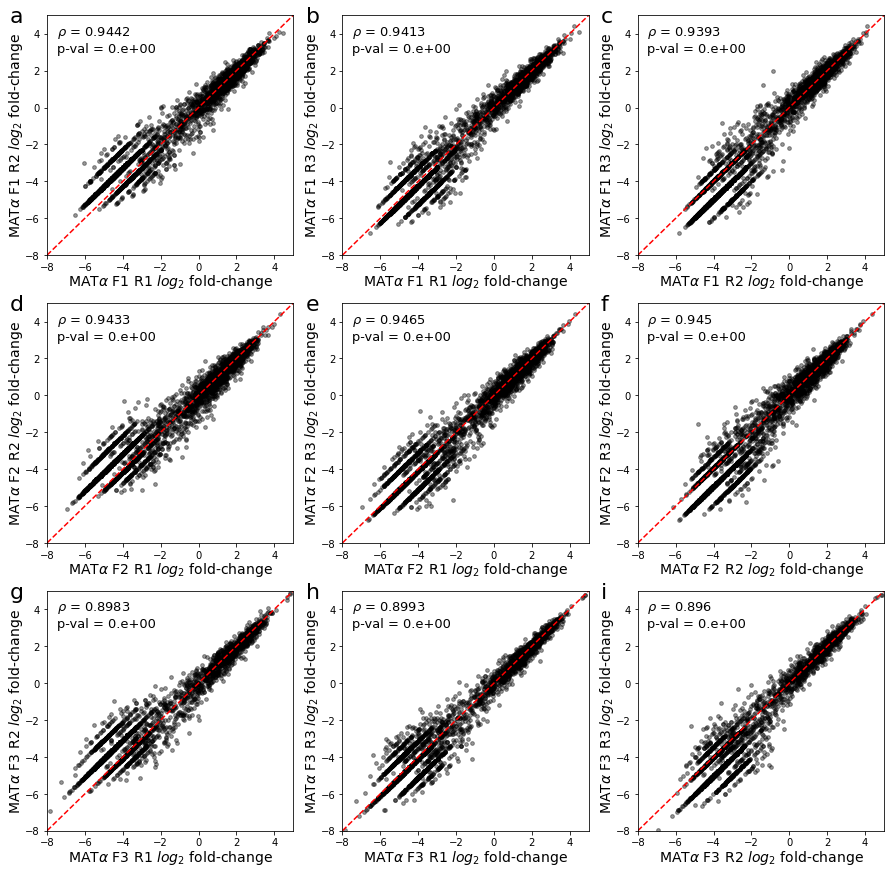

In [28]:

plot_index = 1

plt.figure(figsize=(15,15))

element_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
           
for pair in plot_list:
    
    ax = plt.subplot(int('33'+str(plot_index)))
    
    sample_1 = 'mat_alpha_'+str(pair[0])+str('_')+str(pair[1][0])
    sample_2 = 'mat_alpha_'+str(pair[0])+str('_')+str(pair[1][1])
    
    
    ax.scatter(long_form_df[sample_1], long_form_df[sample_2], color='k', alpha=0.4, s=14.0)
    
    plt.xlabel(r'MAT$\alpha$ F'+str(pair[0])+' R' + str(pair[1][0]) + r' $log_{2}$ fold-change', fontsize=14, labelpad=0.1)
    plt.ylabel(r'MAT$\alpha$ F'+str(pair[0])+' R' + str(pair[1][1]) + r' $log_{2}$ fold-change', fontsize=14, labelpad=0.1)

   
    ax.set_xlim(-8,5)
    ax.set_ylim(-8,5)
        
    plt.text(-0.15, 0.97, element_list[plot_index-1], transform=ax.transAxes, fontsize=22)

    
    
    plt.plot(range(-8,6), range(-8,6), 'r--')
        
    corr, pval = stats.spearmanr(long_form_df[sample_1], long_form_df[sample_2], nan_policy='omit')
    print(len([ x for x in range(0, len(long_form_df[sample_1].to_numpy().flatten())) if np.isnan(long_form_df[sample_2].to_numpy().flatten()[x]) == False and np.isnan(long_form_df[sample_2].to_numpy().flatten()[x])== False]))
    plt.text(-7.5,3, r'$\rho$'+' = '+ str(round(corr,4))+ '\np-val = '+str(np.format_float_scientific(pval, precision=3)), fontsize=13)
    #plt.text(-10.5, 7, plot_title[key], fontsize=20)
           
    plot_index+=1

plt.savefig('./figures/codon_level_corr_matalpha.svg', format='svg', dpi=300)

4000
4000
4000
3825
3825
3825
3919
3919
3919


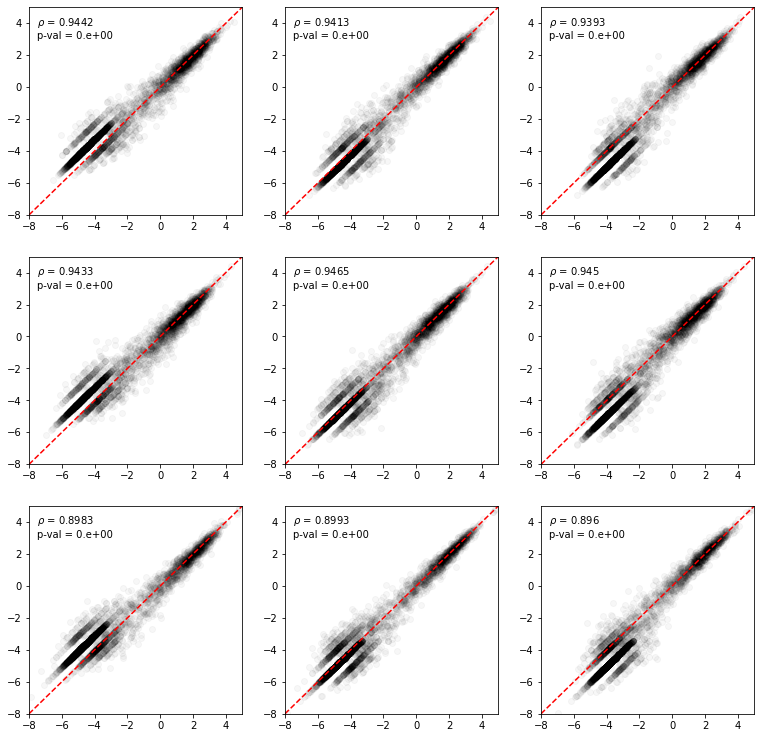

In [29]:

plot_index = 1

plt.figure(figsize=(13,13))
           
for pair in plot_list:
    
    ax = plt.subplot(int('33'+str(plot_index)))
    
    sample_1 = 'mat_alpha_'+str(pair[0])+str('_')+str(pair[1][0])
    sample_2 = 'mat_alpha_'+str(pair[0])+str('_')+str(pair[1][1])
    
    
    #print(sample_1, sample_2)
    
    ax.scatter(long_form_df[sample_1], long_form_df[sample_2], color='k', alpha=0.03)
   
    ax.set_xlim(-8,5)
    ax.set_ylim(-8,5)
    
    
    plt.plot(range(-8,6), range(-8,6), 'r--')
        
    corr, pval = stats.spearmanr(long_form_df[sample_1], long_form_df[sample_2], nan_policy='omit')
    print(len([ x for x in range(0, len(long_form_df[sample_1].to_numpy().flatten())) if np.isnan(long_form_df[sample_2].to_numpy().flatten()[x]) == False and np.isnan(long_form_df[sample_2].to_numpy().flatten()[x])== False]))
    plt.text(-7.5,3, r'$\rho$'+' = '+ str(round(corr,4))+ '\np-val = '+str(np.format_float_scientific(pval, precision=3)))
    #plt.text(-10.5, 7, plot_title[key], fontsize=20)
           
    plot_index+=1



In [30]:
dict_of_dict_rho = {}

sample_list = ['mat_a_1_1', 'mat_a_1_2', 'mat_a_1_3',
               'mat_a_2_1', 'mat_a_2_2', 'mat_a_2_3',
               'mat_a_3_1', 'mat_a_3_2', 'mat_a_3_3',
               'mat_alpha_1_1', 'mat_alpha_1_2', 'mat_alpha_1_3',
               'mat_alpha_2_1', 'mat_alpha_2_2', 'mat_alpha_2_3',
               'mat_alpha_3_1', 'mat_alpha_3_2', 'mat_alpha_3_3']

for pool_1 in sample_list:
    
    row_dict = {}
        
    for pool_2 in sample_list:
        
        if len(long_form_df[(long_form_df[pool_1]>-100)&(long_form_df[pool_2]>-100)]) >1:
        
            corr, pval = stats.spearmanr(long_form_df[pool_1], long_form_df[pool_2], nan_policy='omit')
            #print(corr)
            
            row_dict[pool_2] = corr
            
        else:
            #print(np.NaN)
            
            row_dict[pool_2] = np.NaN
            
    dict_of_dict_rho[pool_1] = row_dict

    
FC4_fold_change_corr = pd.DataFrame(dict_of_dict_rho)

FC4_fold_change_corr

,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_a_2_1,mat_a_2_2,mat_a_2_3,mat_a_3_1,mat_a_3_2,mat_a_3_3,mat_alpha_1_1,mat_alpha_1_2,mat_alpha_1_3,mat_alpha_2_1,mat_alpha_2_2,mat_alpha_2_3,mat_alpha_3_1,mat_alpha_3_2,mat_alpha_3_3
mat_a_1_1,1.000000,0.953626,0.952006,0.936948,0.937320,0.937649,NaN,NaN,NaN,0.794232,0.776042,0.794052,0.782196,0.767740,0.776580,NaN,NaN,NaN
mat_a_1_2,0.953626,1.000000,0.951600,0.934118,0.927712,0.929733,NaN,NaN,NaN,0.795498,0.783262,0.795505,0.784949,0.777467,0.782988,NaN,NaN,NaN
mat_a_1_3,0.952006,0.951600,1.000000,0.938406,0.930654,0.930706,NaN,NaN,NaN,0.791751,0.774213,0.792479,0.784436,0.772448,0.781404,NaN,NaN,NaN
mat_a_2_1,0.936948,0.934118,0.938406,1.000000,0.951486,0.957385,0.906207,0.896576,0.901328,0.785450,0.771854,0.780752,0.761831,0.750805,0.765292,0.731817,0.728138,0.732261
mat_a_2_2,0.937320,0.927712,0.930654,0.951486,1.000000,0.950313,0.895203,0.889848,0.890350,0.787612,0.772806,0.775910,0.764869,0.757359,0.769968,0.743295,0.746545,0.747132
mat_a_2_3,0.937649,0.929733,0.930706,0.957385,0.950313,1.000000,0.902982,0.894735,0.895858,0.784929,0.768057,0.777130,0.764230,0.750775,0.765193,0.731076,0.729935,0.735997
mat_a_3_1,NaN,NaN,NaN,0.906207,0.895203,0.902982,1.000000,0.923128,0.926942,NaN,NaN,NaN,0.731060,0.740848,0.743155,0.724946,0.703988,0.725219
mat_a_3_2,NaN,NaN,NaN,0.896576,0.889848,0.894735,0.923128,1.000000,0.918533,NaN,NaN,NaN,0.730407,0.739636,0.738829,0.726177,0.714889,0.723948
mat_a_3_3,NaN,NaN,NaN,0.901328,0.890350,0.895858,0.926942,0.918533,1.000000,NaN,NaN,NaN,0.737973,0.740180,0.744461,0.730660,0.710588,0.729936
mat_alpha_1_1,0.794232,0.795498,0.791751,0.785450,0.787612,0.784929,NaN,NaN,NaN,1.000000,0.944234,0.941283,0.924178,0.929208,0.927219,NaN,NaN,NaN


In [31]:
format_sample_list = []

for x in sample_list:
    
    sample_info = x.split('_')
    
    if 'mat_a_' in x:
        new_string = 'MATa F'+sample_info[2]+' R'+sample_info[3]
        format_sample_list.append(new_string)
        
    if 'mat_alpha_' in x:
        new_string = r'MAT$\alpha$ F'+sample_info[2]+' R'+sample_info[3]
        format_sample_list.append(new_string)

format_sample_list

['MATa F1 R1',
 'MATa F1 R2',
 'MATa F1 R3',
 'MATa F2 R1',
 'MATa F2 R2',
 'MATa F2 R3',
 'MATa F3 R1',
 'MATa F3 R2',
 'MATa F3 R3',
 'MAT$\\alpha$ F1 R1',
 'MAT$\\alpha$ F1 R2',
 'MAT$\\alpha$ F1 R3',
 'MAT$\\alpha$ F2 R1',
 'MAT$\\alpha$ F2 R2',
 'MAT$\\alpha$ F2 R3',
 'MAT$\\alpha$ F3 R1',
 'MAT$\\alpha$ F3 R2',
 'MAT$\\alpha$ F3 R3']

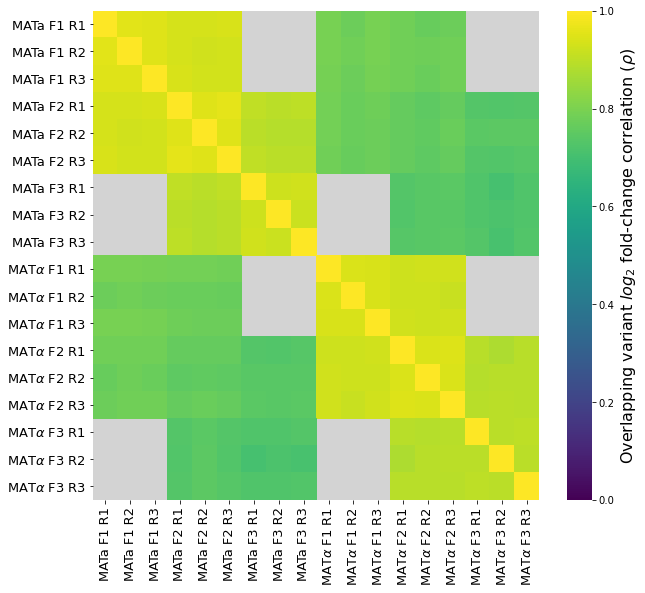

In [32]:
plt.figure(figsize = (10,9))
g = sns.heatmap(FC4_fold_change_corr, cmap='viridis', vmin=0, vmax=1, cbar_kws={'label':r'Overlapping variant $log_{2}$ fold-change correlation ($\rho$)'})

g.set_facecolor('lightgrey')
g.figure.axes[-1].yaxis.label.set_size(16)

plt.xticks([x-0.5 for x in range(1,19)], format_sample_list, fontsize=13)
plt.yticks([x-0.5 for x in range(1,19)], format_sample_list, fontsize=13)

plt.savefig('./figures/all_by_all_corr.svg', format='svg', dpi=300, bbox_inches='tight')

In [33]:
long_form_df['mat_a_1_median'] = long_form_df[['mat_a_1_1','mat_a_1_2','mat_a_1_3']].median(skipna=True, axis=1)
long_form_df['mat_a_2_median'] = long_form_df[['mat_a_2_1','mat_a_2_2','mat_a_2_3']].median(skipna=True, axis=1)
long_form_df['mat_a_3_median'] = long_form_df[['mat_a_3_1','mat_a_3_2','mat_a_3_3']].median(skipna=True, axis=1)

long_form_df['mat_alpha_1_median'] = long_form_df[['mat_alpha_1_1','mat_alpha_1_2','mat_alpha_1_3']].median(skipna=True, axis=1)
long_form_df['mat_alpha_2_median'] = long_form_df[['mat_alpha_2_1','mat_alpha_2_2','mat_alpha_2_3']].median(skipna=True, axis=1)
long_form_df['mat_alpha_3_median'] = long_form_df[['mat_alpha_3_1','mat_alpha_3_2','mat_alpha_3_3']].median(skipna=True, axis=1)

long_form_df

,codon,wt_codon,wt_aa,measured_codon,measured_aa,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_alpha_1_1,mat_alpha_1_2,...,mat_a_3_3,mat_alpha_3_1,mat_alpha_3_2,mat_alpha_3_3,mat_a_1_median,mat_a_2_median,mat_a_3_median,mat_alpha_1_median,mat_alpha_2_median,mat_alpha_3_median
0,2,GTT,V,AAA,K,-4.386111,-3.585976,-4.336472,-3.454503,-2.722102,...,NaN,NaN,NaN,NaN,-4.336472,NaN,NaN,-3.454503,NaN,NaN
1,2,GTT,V,AAC,N,-4.582031,-3.781896,-4.532392,-3.592007,-2.859605,...,NaN,NaN,NaN,NaN,-4.532392,NaN,NaN,-3.592007,NaN,NaN
2,2,GTT,V,AAG,K,-4.487394,-3.687259,-4.437755,-3.833015,-3.100613,...,NaN,NaN,NaN,NaN,-4.437755,NaN,NaN,-3.833015,NaN,NaN
3,2,GTT,V,AAT,N,-3.558947,-2.758813,-3.509308,NaN,NaN,...,NaN,NaN,NaN,NaN,-3.509308,NaN,NaN,NaN,NaN,NaN
4,2,GTT,V,ACA,T,-4.582031,-3.781896,-4.532392,-4.162322,-3.429921,...,NaN,NaN,NaN,NaN,-4.532392,NaN,NaN,-4.162322,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,158,GAA,E,TGT,C,NaN,NaN,NaN,NaN,NaN,...,-5.738672,-5.639925,-4.726200,-5.752040,NaN,NaN,-5.332462,NaN,NaN,-5.639925
10044,158,GAA,E,TTA,L,NaN,NaN,NaN,NaN,NaN,...,-5.300985,-5.369071,-4.455346,-4.481186,NaN,NaN,-4.894776,NaN,NaN,-4.481186
10045,158,GAA,E,TTC,F,NaN,NaN,NaN,NaN,NaN,...,-5.567060,-5.460219,-4.546494,-5.572334,NaN,NaN,-5.160851,NaN,NaN,-5.460219
10046,158,GAA,E,TTG,L,NaN,NaN,NaN,NaN,NaN,...,-0.412242,-4.532010,-4.618285,-5.644124,NaN,NaN,-0.288889,NaN,NaN,-4.618285


In [34]:
stats.spearmanr(long_form_df['mat_a_1_median'], long_form_df['mat_alpha_1_median'], nan_policy='omit')

SpearmanrResult(correlation=0.8130549818868784, pvalue=0.0)

In [35]:
stats.spearmanr(long_form_df['mat_a_2_median'], long_form_df['mat_alpha_2_median'], nan_policy='omit')

SpearmanrResult(correlation=0.7803616884056718, pvalue=0.0)

In [36]:
stats.spearmanr(long_form_df['mat_a_3_median'], long_form_df['mat_alpha_3_median'], nan_policy='omit')

SpearmanrResult(correlation=0.7526596549778901, pvalue=0.0)

In [37]:
stop_codons = long_form_df['measured_aa']=='*'

synonymous = long_form_df['measured_aa'] == long_form_df['wt_aa']

missense = (long_form_df['measured_aa']!='*') & (long_form_df['measured_aa'] != long_form_df['wt_aa'])

In [38]:
colors=sns.color_palette("hls", 3)
colors[0]='#d41159'
colors

['#d41159',
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

(0.0, 0.5)

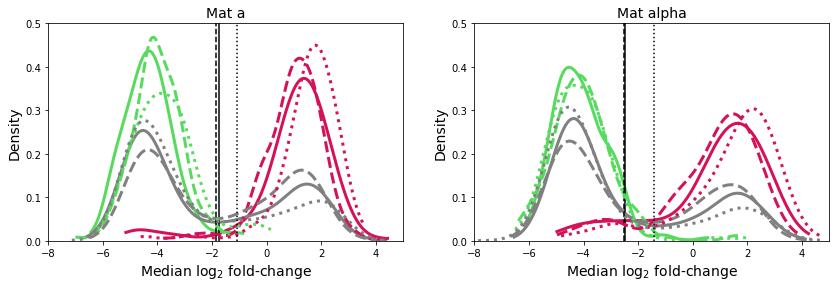

In [39]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.kdeplot(long_form_df[stop_codons]['mat_a_1_median'], color=colors[0], alpha=0.5, lw=3,cut=0)
sns.kdeplot(long_form_df[synonymous]['mat_a_1_median'], color=colors[1], alpha=0.5, lw=3,cut=0)
sns.kdeplot(long_form_df[missense]['mat_a_1_median'], color='grey', alpha=0.5, lw=3,cut=0)

mad = stats.median_abs_deviation(long_form_df[stop_codons]['mat_a_1_median'], nan_policy="omit")
median = np.nanmedian(long_form_df[stop_codons]['mat_a_1_median'])
plt.axvline(median-mad*5, color='k')

sns.kdeplot(long_form_df[stop_codons]['mat_a_2_median'], color=colors[0], alpha=0.5, lw=3,cut=0, linestyle='--')
sns.kdeplot(long_form_df[synonymous]['mat_a_2_median'], color=colors[1], alpha=0.5, lw=3,cut=0, linestyle='--')
sns.kdeplot(long_form_df[missense]['mat_a_2_median'], color='grey', alpha=0.5, lw=3,cut=0, linestyle='--')

mad = stats.median_abs_deviation(long_form_df[stop_codons]['mat_a_2_median'], nan_policy="omit")
median = np.nanmedian(long_form_df[stop_codons]['mat_a_2_median'])
plt.axvline(median-mad*5, color='k', linestyle='--')


sns.kdeplot(long_form_df[stop_codons]['mat_a_3_median'], color=colors[0], alpha=0.5, lw=3,cut=0, linestyle='dotted')
sns.kdeplot(long_form_df[synonymous]['mat_a_3_median'], color=colors[1], alpha=0.5, lw=3,cut=0, linestyle='dotted')
sns.kdeplot(long_form_df[missense]['mat_a_3_median'], color='grey', alpha=0.5, lw=3,cut=0, linestyle='dotted')

mad = stats.median_abs_deviation(long_form_df[stop_codons]['mat_a_3_median'], nan_policy="omit")
median = np.nanmedian(long_form_df[stop_codons]['mat_a_3_median'])
plt.axvline(median-mad*5, color='k', linestyle='dotted')

plt.title('Mat a', fontsize=14)
plt.xlabel('Median $\log_2$ fold-change', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(-8,5)
plt.ylim(0,0.5)


plt.subplot(122)

sns.kdeplot(long_form_df[stop_codons]['mat_alpha_1_median'], color=colors[0], alpha=0.5, lw=3,cut=0)
sns.kdeplot(long_form_df[synonymous]['mat_alpha_1_median'], color=colors[1], alpha=0.5, lw=3,cut=0)
sns.kdeplot(long_form_df[missense]['mat_alpha_1_median'], color='grey', alpha=0.5, lw=3,cut=0)

mad = stats.median_abs_deviation(long_form_df[stop_codons]['mat_alpha_1_median'], nan_policy="omit")
median = np.nanmedian(long_form_df[stop_codons]['mat_alpha_1_median'])
plt.axvline(median-mad*4, color='k')

sns.kdeplot(long_form_df[stop_codons]['mat_alpha_2_median'], color=colors[0], alpha=0.5, lw=3,cut=0, linestyle='--')
sns.kdeplot(long_form_df[synonymous]['mat_alpha_2_median'], color=colors[1], alpha=0.5, lw=3,cut=0, linestyle='--')
sns.kdeplot(long_form_df[missense]['mat_alpha_2_median'], color='grey', alpha=0.5, lw=3,cut=0, linestyle='--')

mad = stats.median_abs_deviation(long_form_df[stop_codons]['mat_alpha_2_median'], nan_policy="omit")
median = np.nanmedian(long_form_df[stop_codons]['mat_alpha_2_median'])
plt.axvline(median-mad*4, color='k', linestyle='--')


sns.kdeplot(long_form_df[stop_codons]['mat_alpha_3_median'], color=colors[0], alpha=0.5, lw=3,cut=0, linestyle='dotted')
sns.kdeplot(long_form_df[synonymous]['mat_alpha_3_median'], color=colors[1], alpha=0.5, lw=3,cut=0, linestyle='dotted')
sns.kdeplot(long_form_df[missense]['mat_alpha_3_median'], color='grey', alpha=0.5, lw=3,cut=0, linestyle='dotted')

mad = stats.median_abs_deviation(long_form_df[stop_codons]['mat_alpha_3_median'], nan_policy="omit")
median = np.nanmedian(long_form_df[stop_codons]['mat_alpha_3_median'])
plt.axvline(median-mad*4, color='k', linestyle='dotted')


plt.title('Mat alpha', fontsize=14)
plt.xlabel('Median $\log_2$ fold-change', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(-8,5)
plt.ylim(0,0.5)

In [40]:
aa_order=['*', 'G','A','V', 'L', 'I', 'M', 'C', 'P', 'W', 'F', 'Y', 'S', 'T', 'N', 'Q', 'H', 'K', 'R', 'D', 'E']
# order in which aas will be listed

In [41]:
codontable_standard = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    }
# standard genetic code



def convert_col_to_aa_updated(df, df_column):
    # converts a dict of dict of log2 fold-change at the codon level
    # by averaging codons encoding the same amino acid. Also returns
    # the distribution of standard deviation for each aa based on the number
    # of codons that contributed to the mean
    
    
    codon_dict = df.pivot('measured_codon', 'codon', df_column).to_dict() 
       
    aa_dict_of_dicts_mean = {}
    # container for the dict of dict that will be converted to a DataFrame
    # for mean log2 fold-change
    
    aa_dict_of_dicts_median = {}
    # container for the dict of dict that will be converted to a DataFrame
    # for median log2 fold-change
    
    aa_dict_of_dicts_mad = {}
    # container for the dict of dict that will be converted to a DataFrame
    # for median absolute deviation of codons for a specific aa 
    
    detected_codon_dist = Counter()
    # counter object to get the distribution of the number of detected codons
    # per aa 
    
    mad_by_n_codon_dict = {1:[],
                           2:[],
                           3:[],
                           4:[],
                           5:[],
                           6:[]}
    # dict to store lists of median absolute deviation values based on 
    # the observed number of codons for an aa
    
    for pos in list(codon_dict.keys()):
        # go trough positions in FCY1
        
        
        aa_dict_vals = {}
        # position specific list of log2 fold-change values for each aa
        
        
        aa_dict_of_dicts_median[pos] = {}
        # position specific dict for aa median log2 fold-change
        
        
        n_codons_detected_dict={}
        # dict to store the info on the number of codons detected for 
        # a specific aa level variant        
        
        for codon in list(codon_dict[pos].keys()):            
            # loop thourhg each codon level variant
            
            aa = codontable_standard[codon]
            # translate it to aa
            
            if np.isnan(codon_dict[pos][codon]) == False:
                # only consider variants which are valid entries
            
                if aa in list(aa_dict_vals.keys()):           
                    aa_dict_vals[aa] += [codon_dict[pos][codon]]
                    # if en entry for a specific aa already exist, add
                    # log2 fold change to sum (to calculate  mean)
                    
                    n_codons_detected_dict[aa] +=1
                    # update the number of detected codons

                else:
                    aa_dict_vals[aa] = [codon_dict[pos][codon]]
                    # if this is a new aa, create the entry
                    n_codons_detected_dict[aa] =1
                    # update the number of detected codons
                    
        for aa in list(n_codons_detected_dict.keys()):
            # loop through the amino acids
            
            n_codons_detected = n_codons_detected_dict[aa]
            # retrieve the number of codons that were detected
                       
            aa_dict_of_dicts_median[pos][aa] = np.median(aa_dict_vals[aa])
            # calculate the mean log2 fold-change for each aa
            
            n_codons = n_codons_detected_dict[aa]
            detected_codon_dist[n_codons]+=1
            # get number of detected codons, and update counter accordingly
                
    return  aa_dict_of_dicts_median
    # return the dict




#convert_col_to_aa_updated(long_form_df, 'mat_a_1_median')[1]


In [42]:
codon_series_dict={}
# container for FCY1 position in the long form DataFrame
wt_series_dict={}
# container for wt aa in the long form DataFrame
measured_series_dict={}
# container dms mutant in the long form DataFrame


index_val=0
# counter for index value

for x in range(2,159):
    # for positions in FCY1
    
    for y in range(0,21):
        # for mutant in aa order
        
        codon_series_dict[index_val] = x
        # store FCY1 position
        wt_series_dict[index_val] = wt_aa_dict[x]
        # store wt aa
        measured_series_dict[index_val] = aa_order[y]
        # store measured mutant
        
        index_val+=1
        # increment index
        

print(len(codon_series_dict), len(wt_series_dict), len(measured_series_dict))

aa_df = pd.DataFrame([pd.Series(codon_series_dict, name='codon'), pd.Series(wt_series_dict, name='wt'), pd.Series(measured_series_dict, name='measured')]).T
# make df

3297 3297 3297


In [43]:
aa_df

,codon,wt,measured
0,2,V,*
1,2,V,G
2,2,V,A
3,2,V,V
4,2,V,L
...,...,...,...
3292,158,E,H
3293,158,E,K
3294,158,E,R
3295,158,E,D


In [44]:
def add_median_col(df, df_column):
    
    dict_of_dict_col = convert_col_to_aa_updated(df, df_column)
    
    col_as_dict = {}
    
    index=0
    
    for x in range(2,159):
    # for positions in FCY1
    
        for y in range(0,21):
        # for mutant in aa order
        
            if dict_of_dict_col[x] != {}:
                
                #print(dict_of_dict_col[x])
                
                if aa_order[y] in list(dict_of_dict_col[x].keys()):
                
                    col_as_dict[index] = dict_of_dict_col[x][aa_order[y]]
                    
                else:
                    col_as_dict[index] = np.NaN
                
            else:
                col_as_dict[index] = np.NaN
                
            index+=1
            
            
    aa_df[df_column] = pd.Series(col_as_dict)
                        
        

In [45]:
#add_median_col(long_form_df, 'mat_a_1_median')

aa_df

,codon,wt,measured
0,2,V,*
1,2,V,G
2,2,V,A
3,2,V,V
4,2,V,L
...,...,...,...
3292,158,E,H
3293,158,E,K
3294,158,E,R
3295,158,E,D


In [46]:
for col in ['mat_a_1_1', 'mat_a_1_2', 'mat_a_1_3',
               'mat_a_2_1', 'mat_a_2_2', 'mat_a_2_3',
               'mat_a_3_1', 'mat_a_3_2', 'mat_a_3_3',
               'mat_alpha_1_1', 'mat_alpha_1_2', 'mat_alpha_1_3',
               'mat_alpha_2_1', 'mat_alpha_2_2', 'mat_alpha_2_3',
               'mat_alpha_3_1', 'mat_alpha_3_2', 'mat_alpha_3_3']:
    add_median_col(long_form_df, col)
    
    

syn = aa_df[aa_df['wt']==aa_df['measured']]
nonsense = aa_df[(aa_df['measured']=='*') & (aa_df['codon'] >5) & (aa_df['codon'] <158)]    

    
for col in ['mat_a_1_1', 'mat_a_1_2', 'mat_a_1_3',
               'mat_a_2_1', 'mat_a_2_2', 'mat_a_2_3',
               'mat_a_3_1', 'mat_a_3_2', 'mat_a_3_3',
               'mat_alpha_1_1', 'mat_alpha_1_2', 'mat_alpha_1_3',
               'mat_alpha_2_1', 'mat_alpha_2_2', 'mat_alpha_2_3',
               'mat_alpha_3_1', 'mat_alpha_3_2', 'mat_alpha_3_3']:
    
    print(np.nanmedian(syn[col]), (np.nanmedian(nonsense[col])))
    
    aa_df[(col + '_norm')] = (aa_df[col]-np.nanmedian(syn[col]))/(np.nanmedian(nonsense[col])-np.nanmedian(syn[col]))
    
    
    
    
    
    
    
    
#for col in ['mat_a_1_median', 'mat_a_2_median', 'mat_a_3_median', 'mat_alpha_1_median', 'mat_alpha_2_median', 'mat_alpha_3_median']:
#    add_median_col(long_form_df, col)

-4.412105824324186 1.280013874343675
-3.849010448451004 1.2886659406333125
-4.4618020229648225 1.3642969103875213
-4.03330783283838 1.0655972080177172
-3.3715880687857 1.1881176888437848
-4.2828898461268885 1.2326161075914213
-3.9659300874029757 1.7831165122365835
-3.4084937250039715 1.6669054091395457
-4.040936075532989 1.6692981560138476
-4.378833620814728 1.4635712836499568
-3.734025142839778 1.293707429618859
-4.59641839571278 1.4566894865818556
-4.057091909964226 1.1676887773419677
-3.7588136598112047 1.042344325408628
-4.369070634933898 1.2423877801938472
-4.309027566858092 1.8427989675253453
-3.7093184956194136 1.8047689778143843
-4.383888593856863 1.8657600534428669


In [47]:
aa_df['mat_a_1_norm_median'] = aa_df[['mat_a_1_1_norm','mat_a_1_2_norm','mat_a_1_3_norm']].median(skipna=True, axis=1)
aa_df['mat_a_2_norm_median'] = aa_df[['mat_a_2_1_norm','mat_a_2_2_norm','mat_a_2_3_norm']].median(skipna=True, axis=1)
aa_df['mat_a_3_norm_median'] = aa_df[['mat_a_3_1_norm','mat_a_3_2_norm','mat_a_3_3_norm']].median(skipna=True, axis=1)

aa_df['mat_alpha_1_norm_median'] = aa_df[['mat_alpha_1_1_norm','mat_alpha_1_2_norm','mat_alpha_1_3_norm']].median(skipna=True, axis=1)
aa_df['mat_alpha_2_norm_median'] = aa_df[['mat_alpha_2_1_norm','mat_alpha_2_2_norm','mat_alpha_2_3_norm']].median(skipna=True, axis=1)
aa_df['mat_alpha_3_norm_median'] = aa_df[['mat_alpha_3_1_norm','mat_alpha_3_2_norm','mat_alpha_3_3_norm']].median(skipna=True, axis=1)


aa_df.loc[3275][['mat_a_1_1_norm','mat_a_1_2_norm','mat_a_1_3_norm', 'mat_a_1_norm_median']]

mat_a_1_1_norm         NaN
mat_a_1_2_norm         NaN
mat_a_1_3_norm         NaN
mat_a_1_norm_median    NaN
Name: 3275, dtype: object

In [48]:
DMS_data = pd.read_csv('./S_table_6.csv', sep=',', index_col=0)

DMS_data

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,ddG_struc_HET,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site,mut_type
0,2,V,*,-3.848973,-3.934894,0.096862,-3.763052,0.213533,-4.425231,-4.769127,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,NaN,NaN,Elbow
1,2,V,G,-0.804103,-0.779520,0.051921,-0.828687,0.074847,-4.261140,-4.305138,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.000000,NaN,Wt-like
2,2,V,A,-0.725852,-0.455205,0.315889,-0.996499,0.119774,-3.792236,-3.869612,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.129032,NaN,Wt-like
3,2,V,V,-0.587940,-0.506614,0.391231,-0.669265,0.074170,-4.350391,-4.148804,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.096774,NaN,Wt-like
4,2,V,L,-0.906831,-0.790490,0.306158,-1.023172,0.072184,-4.320468,-4.381116,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.032258,NaN,Wt-like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.08375,-0.23928,0.01440,-0.15748,0.0553,0.595794,20.715000,0.009479,5.711372,Wt-like
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.63414,-1.22820,0.26376,0.25662,0.0553,0.595794,20.715000,0.037915,5.711372,Wt-like
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.84740,-1.73269,0.27192,0.09690,0.0553,0.595794,20.715000,0.004739,5.711372,Wt-like
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.31390,0.64312,0.10866,0.19564,0.0553,0.595794,20.715000,0.000000,5.711372,Wt-like


In [49]:
aa_df['FC_score'] = DMS_data['FC_score']

In [50]:
for x in ['mat_a_1_norm_median', 'mat_a_2_norm_median', 'mat_a_3_norm_median', 'mat_alpha_1_norm_median', 'mat_alpha_2_norm_median', 'mat_alpha_3_norm_median']:
    
    print(stats.spearmanr(aa_df['FC_score'], aa_df[x], nan_policy='omit'))

SpearmanrResult(correlation=0.7963002222977326, pvalue=7.407164074352292e-300)
SpearmanrResult(correlation=0.8039115482534812, pvalue=4.508648793997325e-294)
SpearmanrResult(correlation=0.6787746883259413, pvalue=1.208313329723534e-181)
SpearmanrResult(correlation=0.781816273360281, pvalue=1.5699022565841375e-282)
SpearmanrResult(correlation=0.7920460146326526, pvalue=2.009847600751517e-279)
SpearmanrResult(correlation=0.6788628499641983, pvalue=1.0414280003639489e-181)


In [51]:
dict_of_dict_rho_aa = {}

sample_list = ['mat_a_1_norm_median', 'mat_a_2_norm_median', 'mat_a_3_norm_median', 
               'mat_alpha_1_norm_median', 'mat_alpha_2_norm_median', 'mat_alpha_3_norm_median',
               'FC_score']

for col_1 in sample_list:
    
    row_dict = {}
        
    for col_2 in sample_list:
        
        if len(aa_df[(aa_df[col_1]>-100)&(aa_df[col_2]>-100)]) >1:
        
            corr, pval = stats.spearmanr(aa_df[col_1], aa_df[col_2], nan_policy='omit')
            #print(corr)
            
            row_dict[col_2] = corr
            
        else:
            #print(np.NaN)
            
            row_dict[col_2] = np.NaN
            
    dict_of_dict_rho_aa[col_1] = row_dict

    
aa_fold_change_corr = pd.DataFrame(dict_of_dict_rho_aa)

aa_fold_change_corr

,mat_a_1_norm_median,mat_a_2_norm_median,mat_a_3_norm_median,mat_alpha_1_norm_median,mat_alpha_2_norm_median,mat_alpha_3_norm_median,FC_score
mat_a_1_norm_median,1.000000,0.955904,NaN,0.847347,0.856585,NaN,0.796300
mat_a_2_norm_median,0.955904,1.000000,0.928982,0.846348,0.848332,0.814607,0.803912
mat_a_3_norm_median,NaN,0.928982,1.000000,NaN,0.811903,0.776127,0.678775
mat_alpha_1_norm_median,0.847347,0.846348,NaN,1.000000,0.954156,NaN,0.781816
mat_alpha_2_norm_median,0.856585,0.848332,0.811903,0.954156,1.000000,0.946305,0.792046
mat_alpha_3_norm_median,NaN,0.814607,0.776127,NaN,0.946305,1.000000,0.678863
FC_score,0.796300,0.803912,0.678775,0.781816,0.792046,0.678863,1.000000


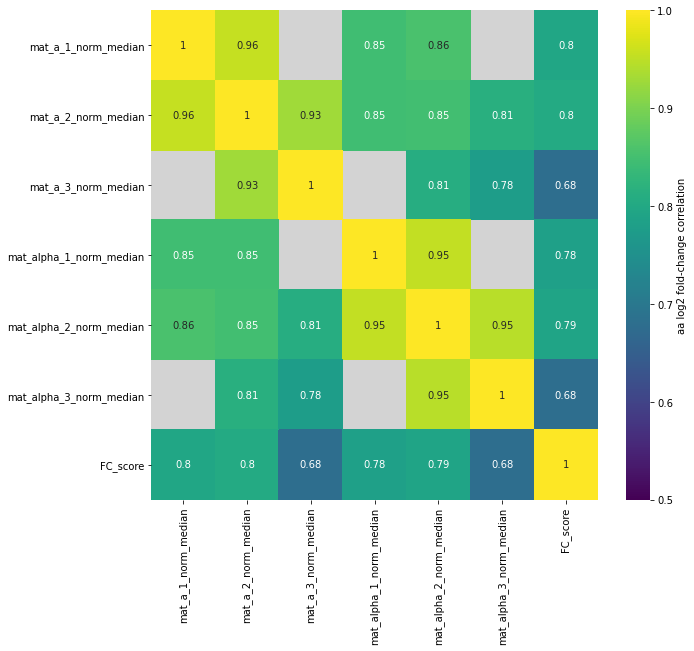

In [52]:
plt.figure(figsize = (10,9))
g = sns.heatmap(aa_fold_change_corr, cmap='viridis', vmin=0.5, vmax=1, cbar_kws={'label':'aa log2 fold-change correlation'}, annot=True)

g.set_facecolor('lightgrey')

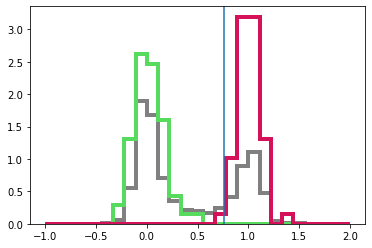

In [53]:
syn = aa_df[aa_df['wt']==aa_df['measured']]
nonsense = aa_df[(aa_df['measured']=='*') & (aa_df['codon'] >5) & (aa_df['codon'] <158)]



plt.hist(aa_df['mat_a_1_norm_median'], bins=np.linspace(-1,2,28), density=True, histtype='step', color='grey', lw=4)

plt.hist(syn['mat_a_1_norm_median'], bins=np.linspace(-1,2,28), density=True, histtype='step', color=colors[1], lw=4)
plt.hist(nonsense['mat_a_1_norm_median'], bins=np.linspace(-1,2,28), density=True, histtype='step', color=colors[0], lw=4)

plt.axvline(np.nanpercentile(nonsense['mat_a_1_norm_median'], 0.01))

In [54]:
aa_df['overall_median'] =aa_df[['mat_a_1_norm_median','mat_a_2_norm_median','mat_a_3_norm_median',
                                'mat_alpha_1_norm_median','mat_alpha_2_norm_median','mat_alpha_3_norm_median']].median(numeric_only=True, axis=1)
                                        
aa_df

,codon,wt,measured,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_a_2_1,mat_a_2_2,mat_a_2_3,mat_a_3_1,...,mat_alpha_3_2_norm,mat_alpha_3_3_norm,mat_a_1_norm_median,mat_a_2_norm_median,mat_a_3_norm_median,mat_alpha_1_norm_median,mat_alpha_2_norm_median,mat_alpha_3_norm_median,FC_score,overall_median
0,2,V,*,-4.627119,-3.826984,-4.577480,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.019855,NaN,NaN,0.022385,NaN,NaN,-0.197819,0.001265
1,2,V,G,-5.157296,-4.373192,-5.123687,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.113607,NaN,NaN,-0.061287,NaN,NaN,-0.163936,-0.087447
2,2,V,A,-4.801714,-4.001580,-4.752075,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.049823,NaN,NaN,0.028901,NaN,NaN,-0.067115,-0.010461
3,2,V,V,-5.277176,-3.477042,-3.642575,NaN,NaN,NaN,NaN,...,NaN,NaN,0.072400,NaN,NaN,-0.083743,NaN,NaN,-0.182365,-0.005671
4,2,V,L,-4.899342,-4.099208,-4.831206,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.063405,NaN,NaN,0.006310,NaN,NaN,-0.176187,-0.028548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,-5.074609,...,-0.140922,-0.180542,NaN,NaN,-0.192846,NaN,NaN,-0.140922,-0.618938,-0.166884
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,-4.077485,...,0.048934,-0.093036,NaN,NaN,-0.019404,NaN,NaN,-0.088460,-0.255429,-0.053932
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,-4.705405,...,-0.064536,-0.113147,NaN,NaN,-0.128626,NaN,NaN,-0.108890,-0.553013,-0.118758
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,-3.088172,...,0.391061,0.440530,NaN,NaN,0.095715,NaN,NaN,0.410763,-0.613846,0.253239


Text(0.5, 0, 'DMSv1 FC_score')

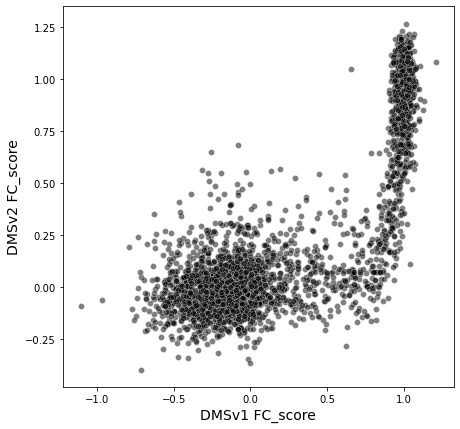

In [55]:
plt.figure(figsize = (7,7))
sns.scatterplot(data=aa_df, x = 'FC_score', y= 'overall_median', color='k', alpha=0.5)

plt.ylabel('DMSv2 FC_score', fontsize=14)
plt.xlabel('DMSv1 FC_score', fontsize=14)

In [56]:
stats.spearmanr(aa_df['FC_score'], aa_df['overall_median'], nan_policy='omit')

SpearmanrResult(correlation=0.7657105358422169, pvalue=0.0)

In [57]:
len(aa_df['overall_median'].dropna()), len(aa_df['overall_median']), len(aa_df['overall_median'].dropna())/len(aa_df['overall_median'])


(3272, 3297, 0.9924173491052471)

In [58]:
3272/3297

0.9924173491052471

In [59]:
aa_df['crossed_pool_median'] =aa_df[['mat_a_1_1_norm', 'mat_a_1_2_norm', 
                                     'mat_a_2_1_norm', 'mat_a_2_2_norm', 
                                     'mat_a_3_1_norm', 'mat_a_3_2_norm', 
                                     'mat_alpha_1_1_norm', 'mat_alpha_2_1_norm', 'mat_alpha_3_1_norm']].median(numeric_only=True, axis=1)
                                        
aa_df

,codon,wt,measured,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_a_2_1,mat_a_2_2,mat_a_2_3,mat_a_3_1,...,mat_alpha_3_3_norm,mat_a_1_norm_median,mat_a_2_norm_median,mat_a_3_norm_median,mat_alpha_1_norm_median,mat_alpha_2_norm_median,mat_alpha_3_norm_median,FC_score,overall_median,crossed_pool_median
0,2,V,*,-4.627119,-3.826984,-4.577480,NaN,NaN,NaN,NaN,...,NaN,-0.019855,NaN,NaN,0.022385,NaN,NaN,-0.197819,0.001265,0.004287
1,2,V,G,-5.157296,-4.373192,-5.123687,NaN,NaN,NaN,NaN,...,NaN,-0.113607,NaN,NaN,-0.061287,NaN,NaN,-0.163936,-0.087447,-0.102027
2,2,V,A,-4.801714,-4.001580,-4.752075,NaN,NaN,NaN,NaN,...,NaN,-0.049823,NaN,NaN,0.028901,NaN,NaN,-0.067115,-0.010461,-0.029696
3,2,V,V,-5.277176,-3.477042,-3.642575,NaN,NaN,NaN,NaN,...,NaN,0.072400,NaN,NaN,-0.083743,NaN,NaN,-0.182365,-0.005671,-0.087058
4,2,V,L,-4.899342,-4.099208,-4.831206,NaN,NaN,NaN,NaN,...,NaN,-0.063405,NaN,NaN,0.006310,NaN,NaN,-0.176187,-0.028548,-0.048699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,-5.074609,...,-0.180542,NaN,NaN,-0.192846,NaN,NaN,-0.140922,-0.618938,-0.166884,-0.179591
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,-4.077485,...,-0.093036,NaN,NaN,-0.019404,NaN,NaN,-0.088460,-0.255429,-0.053932,-0.019404
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,-4.705405,...,-0.113147,NaN,NaN,-0.128626,NaN,NaN,-0.108890,-0.553013,-0.118758,-0.108890
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,-3.088172,...,0.440530,NaN,NaN,0.095715,NaN,NaN,0.410763,-0.613846,0.253239,0.152679


In [60]:
len(aa_df['crossed_pool_median'].dropna()), len(aa_df['crossed_pool_median']), len(aa_df['crossed_pool_median'].dropna())/len(aa_df['crossed_pool_median'])


(3272, 3297, 0.9924173491052471)

Text(-1, 1.1, 'pval=0.e+00')

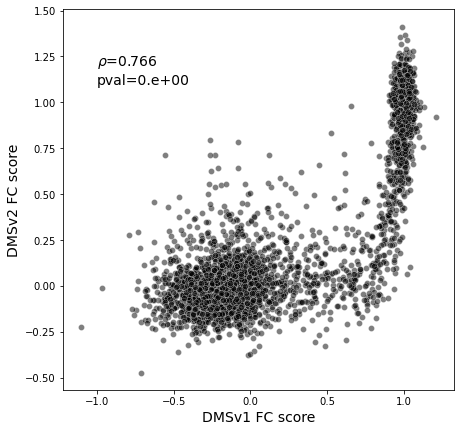

In [61]:
plt.figure(figsize = (7,7))
sns.scatterplot(data=aa_df, x = 'FC_score', y= 'crossed_pool_median', color='k', alpha=0.5)

plt.ylabel('DMSv2 FC score', fontsize=14)
plt.xlabel('DMSv1 FC score', fontsize=14)


vals = stats.spearmanr(aa_df['FC_score'], aa_df['overall_median'], nan_policy='omit')
plt.text(-1,1.2, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(-1,1.1, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)


In [62]:
n_mutants_codon_pool_1 = 0
n_mutants_codon_pool_2 = 0
n_mutants_codon_pool_3 = 0


pool_1_res = aa_df[(aa_df['overall_median']>0.3)&(aa_df['codon']<68)]

pool_2_res = aa_df[(aa_df['overall_median']>0.3)&(aa_df['codon']<111)&(aa_df['codon']>48)]

pool_3_res = aa_df[(aa_df['overall_median']>0.3)&(aa_df['codon']>92)]


for x in list(pool_1_res['measured']):
    n_mutants_codon_pool_1+=list(codontable_standard.values()).count(x)
    
for x in list(pool_2_res['measured']):
    n_mutants_codon_pool_2+=list(codontable_standard.values()).count(x)
    
for x in list(pool_3_res['measured']):
    n_mutants_codon_pool_3+=list(codontable_standard.values()).count(x)
    
print(n_mutants_codon_pool_1, n_mutants_codon_pool_2, n_mutants_codon_pool_3)


for x in [n_mutants_codon_pool_1, n_mutants_codon_pool_2, n_mutants_codon_pool_3]:
    
    for y in [n_mutants_codon_pool_1, n_mutants_codon_pool_2, n_mutants_codon_pool_3]:
        
        
        print((25*(10**7))/x,  (25*(10**7))/y,  (25*(10**7))/(x*y))

1639 1836 1248
152532.0317266626 152532.0317266626 93.06408281065443
152532.0317266626 136165.57734204794 83.07844865286634
152532.0317266626 200320.5128205128 122.22117926815913
136165.57734204794 152532.0317266626 83.07844865286634
136165.57734204794 136165.57734204794 74.16425781157295
136165.57734204794 200320.5128205128 109.10703312664097
200320.5128205128 152532.0317266626 122.22117926815913
200320.5128205128 136165.57734204794 109.10703312664097
200320.5128205128 200320.5128205128 160.51323142669295


In [63]:
10**7

10000000

In [64]:
aa_df.loc[1390]

codon                            68
wt                                L
measured                          L
mat_a_1_1                       NaN
mat_a_1_2                       NaN
mat_a_1_3                       NaN
mat_a_2_1                  -4.00356
mat_a_2_2                 -3.214047
mat_a_2_3                 -3.794143
mat_a_3_1                       NaN
mat_a_3_2                       NaN
mat_a_3_3                       NaN
mat_alpha_1_1                   NaN
mat_alpha_1_2                   NaN
mat_alpha_1_3                   NaN
mat_alpha_2_1             -3.818932
mat_alpha_2_2             -3.680811
mat_alpha_2_3             -4.604884
mat_alpha_3_1                   NaN
mat_alpha_3_2                   NaN
mat_alpha_3_3                   NaN
mat_a_1_1_norm                  NaN
mat_a_1_2_norm                  NaN
mat_a_1_3_norm                  NaN
mat_a_2_1_norm             0.005834
mat_a_2_2_norm             0.034551
mat_a_2_3_norm             0.088613
mat_a_3_1_norm              

SpearmanrResult(correlation=0.9670032062196277, pvalue=0.0)


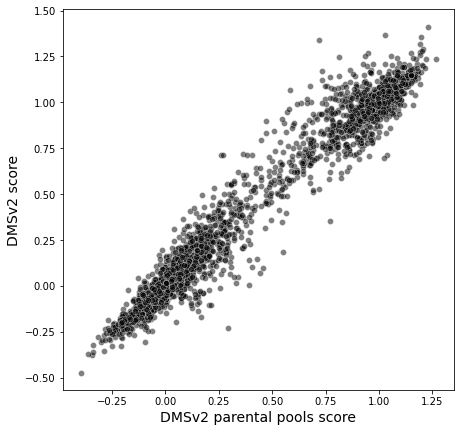

In [65]:
plt.figure(figsize = (7,7))
sns.scatterplot(data=aa_df, x = 'overall_median', y= 'crossed_pool_median', color='k', alpha=0.5)

plt.ylabel('DMSv2 score', fontsize=14)
plt.xlabel('DMSv2 parental pools score', fontsize=14)

print(stats.spearmanr(aa_df['overall_median'], aa_df['crossed_pool_median'], nan_policy='omit'))

In [66]:
syn = aa_df[aa_df['wt']==aa_df['measured']]
nonsense = aa_df[(aa_df['measured']=='*') & (aa_df['codon'] >5) & (aa_df['codon'] <158)]

missense = aa_df[(aa_df['measured'] != aa_df['wt']) & (aa_df['measured']!='*')]

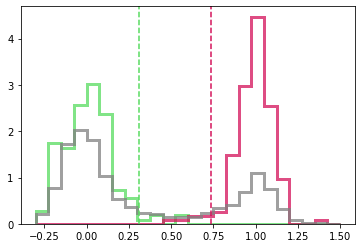

In [67]:
plt.hist(syn['crossed_pool_median'], density=True, bins=np.linspace(-0.3, 1.5, 25), histtype='step', color=colors[1], lw=3, alpha=0.75)
plt.hist(nonsense['crossed_pool_median'], bins=np.linspace(-0.3, 1.5, 25), density=True, histtype='step', color=colors[0], lw=3, alpha=0.75)

plt.hist(missense['crossed_pool_median'], bins=np.linspace(-0.3, 1.5, 25), density=True, histtype='step', color='grey', lw=3, alpha=0.75)

plt.axvline(np.nanpercentile(nonsense['crossed_pool_median'],3), color=colors[0], linestyle='--')
plt.axvline(np.nanpercentile(syn['crossed_pool_median'],97), color=colors[1], linestyle='--')

In [73]:
1071*1071

1147041

In [68]:
np.nanpercentile(syn['crossed_pool_median'],97)
#0.3095815781251863


0.3095815781251863

In [72]:
missense[missense['crossed_pool_median']>0.3095]

,codon,wt,measured,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_a_2_1,mat_a_2_2,mat_a_2_3,mat_a_3_1,...,mat_alpha_3_3_norm,mat_a_1_norm_median,mat_a_2_norm_median,mat_a_3_norm_median,mat_alpha_1_norm_median,mat_alpha_2_norm_median,mat_alpha_3_norm_median,FC_score,overall_median,crossed_pool_median
79,5,G,H,-1.259679,-1.620508,-1.813265,NaN,NaN,NaN,NaN,...,NaN,0.454599,NaN,NaN,0.561214,NaN,NaN,-0.268511,0.507906,0.553823
98,6,M,N,0.517240,-0.191639,0.215406,NaN,NaN,NaN,NaN,...,NaN,0.802803,NaN,NaN,0.006751,NaN,NaN,0.124447,0.404777,0.711873
158,9,K,Y,-2.046836,-1.800159,-1.900875,NaN,NaN,NaN,NaN,...,NaN,0.415534,NaN,NaN,-0.132682,NaN,NaN,0.201472,0.141426,0.398789
174,10,W,M,-1.997068,-0.322465,-1.532392,NaN,NaN,NaN,NaN,...,NaN,0.502808,NaN,NaN,-0.008802,NaN,NaN,-0.253435,0.247003,0.424277
176,10,W,P,-1.959684,-1.389266,-1.617564,NaN,NaN,NaN,NaN,...,NaN,0.478766,NaN,NaN,0.125186,NaN,NaN,0.582419,0.301976,0.430845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,157,G,Y,NaN,NaN,NaN,NaN,NaN,NaN,-1.641621,...,0.041017,NaN,NaN,0.404295,NaN,NaN,0.047725,0.115188,0.226010,0.401163
3268,157,G,T,NaN,NaN,NaN,NaN,NaN,NaN,0.824042,...,0.066417,NaN,NaN,0.869979,NaN,NaN,0.073529,0.525564,0.471754,0.833177
3271,157,G,H,NaN,NaN,NaN,NaN,NaN,NaN,-1.475518,...,0.519081,NaN,NaN,0.357907,NaN,NaN,0.533391,-0.170720,0.445649,0.433187
3272,157,G,K,NaN,NaN,NaN,NaN,NaN,NaN,-0.792629,...,0.129856,NaN,NaN,0.471101,NaN,NaN,0.129856,0.959576,0.300478,0.321850


In [69]:
syn[syn['crossed_pool_median']>0.4]

,codon,wt,measured,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_a_2_1,mat_a_2_2,mat_a_2_3,mat_a_3_1,...,mat_alpha_3_3_norm,mat_a_1_norm_median,mat_a_2_norm_median,mat_a_3_norm_median,mat_alpha_1_norm_median,mat_alpha_2_norm_median,mat_alpha_3_norm_median,FC_score,overall_median,crossed_pool_median
542,27,K,K,-1.208092,-1.786469,-1.858893,NaN,NaN,NaN,NaN,...,NaN,0.446767,NaN,NaN,0.216332,NaN,NaN,-0.064636,0.331550,0.401454
1876,91,C,C,NaN,NaN,NaN,-3.119038,-0.991654,-1.955424,NaN,...,NaN,NaN,0.421986,NaN,NaN,0.415592,NaN,0.362605,0.418789,0.437166
2510,121,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,-0.768534,...,0.259040,NaN,NaN,0.556161,NaN,NaN,0.054331,-0.159183,0.305246,0.553575
2641,127,H,H,NaN,NaN,NaN,NaN,NaN,NaN,-0.780029,...,0.107426,NaN,NaN,0.630228,NaN,NaN,0.107426,0.224638,0.368827,0.554162


In [70]:

aa_df

,codon,wt,measured,mat_a_1_1,mat_a_1_2,mat_a_1_3,mat_a_2_1,mat_a_2_2,mat_a_2_3,mat_a_3_1,...,mat_alpha_3_3_norm,mat_a_1_norm_median,mat_a_2_norm_median,mat_a_3_norm_median,mat_alpha_1_norm_median,mat_alpha_2_norm_median,mat_alpha_3_norm_median,FC_score,overall_median,crossed_pool_median
0,2,V,*,-4.627119,-3.826984,-4.577480,NaN,NaN,NaN,NaN,...,NaN,-0.019855,NaN,NaN,0.022385,NaN,NaN,-0.197819,0.001265,0.004287
1,2,V,G,-5.157296,-4.373192,-5.123687,NaN,NaN,NaN,NaN,...,NaN,-0.113607,NaN,NaN,-0.061287,NaN,NaN,-0.163936,-0.087447,-0.102027
2,2,V,A,-4.801714,-4.001580,-4.752075,NaN,NaN,NaN,NaN,...,NaN,-0.049823,NaN,NaN,0.028901,NaN,NaN,-0.067115,-0.010461,-0.029696
3,2,V,V,-5.277176,-3.477042,-3.642575,NaN,NaN,NaN,NaN,...,NaN,0.072400,NaN,NaN,-0.083743,NaN,NaN,-0.182365,-0.005671,-0.087058
4,2,V,L,-4.899342,-4.099208,-4.831206,NaN,NaN,NaN,NaN,...,NaN,-0.063405,NaN,NaN,0.006310,NaN,NaN,-0.176187,-0.028548,-0.048699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,-5.074609,...,-0.180542,NaN,NaN,-0.192846,NaN,NaN,-0.140922,-0.618938,-0.166884,-0.179591
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,-4.077485,...,-0.093036,NaN,NaN,-0.019404,NaN,NaN,-0.088460,-0.255429,-0.053932,-0.019404
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,-4.705405,...,-0.113147,NaN,NaN,-0.128626,NaN,NaN,-0.108890,-0.553013,-0.118758,-0.108890
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,-3.088172,...,0.440530,NaN,NaN,0.095715,NaN,NaN,0.410763,-0.613846,0.253239,0.152679


In [71]:
aa_df[aa_df['codon'] == 64][['codon', 'wt', 'measured','FC_score', 'overall_median', 'crossed_pool_median']]

,codon,wt,measured,FC_score,overall_median,crossed_pool_median
1302,64,E,*,1.012060,0.929532,0.929532
1303,64,E,G,0.977399,1.112866,1.143253
1304,64,E,A,1.020875,1.149709,1.182571
1305,64,E,V,1.007457,1.047183,1.040125
1306,64,E,L,1.009000,1.057263,1.051274
1307,64,E,I,1.002085,0.928756,0.950040
1308,64,E,M,1.034080,1.192143,1.275626
1309,64,E,C,0.981935,1.028532,1.031186
1310,64,E,P,1.006945,1.017585,1.096852
1311,64,E,W,0.993938,1.047103,1.169453


In [72]:
aa_df.columns

Index(['codon', 'wt', 'measured', 'mat_a_1_1', 'mat_a_1_2', 'mat_a_1_3',
       'mat_a_2_1', 'mat_a_2_2', 'mat_a_2_3', 'mat_a_3_1', 'mat_a_3_2',
       'mat_a_3_3', 'mat_alpha_1_1', 'mat_alpha_1_2', 'mat_alpha_1_3',
       'mat_alpha_2_1', 'mat_alpha_2_2', 'mat_alpha_2_3', 'mat_alpha_3_1',
       'mat_alpha_3_2', 'mat_alpha_3_3', 'mat_a_1_1_norm', 'mat_a_1_2_norm',
       'mat_a_1_3_norm', 'mat_a_2_1_norm', 'mat_a_2_2_norm', 'mat_a_2_3_norm',
       'mat_a_3_1_norm', 'mat_a_3_2_norm', 'mat_a_3_3_norm',
       'mat_alpha_1_1_norm', 'mat_alpha_1_2_norm', 'mat_alpha_1_3_norm',
       'mat_alpha_2_1_norm', 'mat_alpha_2_2_norm', 'mat_alpha_2_3_norm',
       'mat_alpha_3_1_norm', 'mat_alpha_3_2_norm', 'mat_alpha_3_3_norm',
       'mat_a_1_norm_median', 'mat_a_2_norm_median', 'mat_a_3_norm_median',
       'mat_alpha_1_norm_median', 'mat_alpha_2_norm_median',
       'mat_alpha_3_norm_median', 'FC_score', 'overall_median',
       'crossed_pool_median'],
      dtype='object')

In [73]:
def get_aa_df_all(df, df_col):
    
    dict_of_dict={}
    
    for codon in range(2,159):
        
        codon_dict = {}
        
        for aa in range(0,21):
            
            key_aa = aa_order[aa]
            
            val_filter = (df['codon']==codon)&(df['measured']==key_aa)
            
            codon_dict[key_aa] = float(list(df[val_filter][df_col])[0])
            
        dict_of_dict[codon] = codon_dict
        
    return pd.DataFrame(dict_of_dict)

In [74]:
df_heatmap = get_aa_df_all(aa_df, 'overall_median')

In [75]:
import matplotlib.gridspec as gridspec

3272
3272


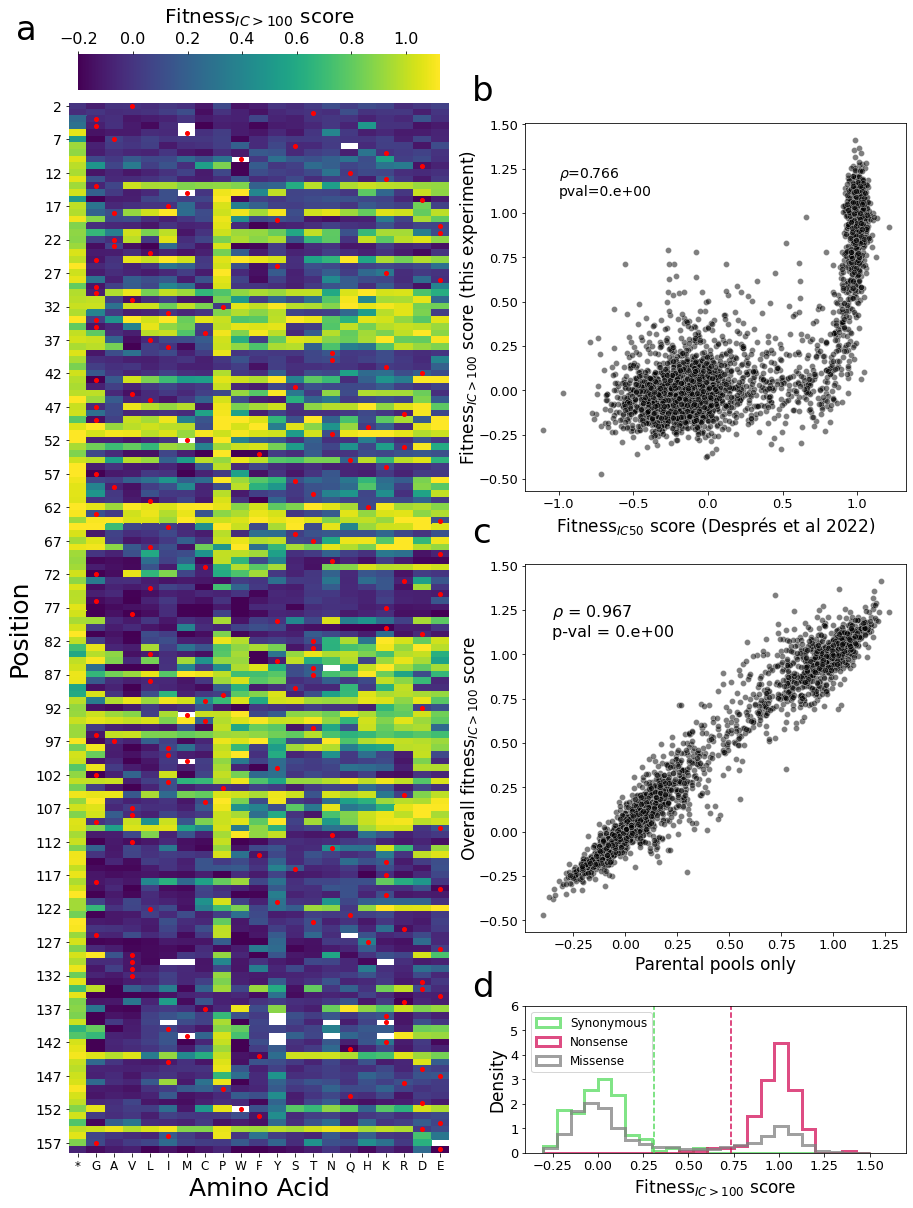

In [77]:
fig = plt.figure(figsize=(15, 23))

gs = fig.add_gridspec(6, 2, hspace=0.5)


ax1 = fig.add_subplot(gs[0:, 0])


sns.heatmap(df_heatmap.T, square=False, cmap='viridis',cbar_kws={'shrink':0.95, "pad" : 0.01, 'use_gridspec':False, 'location':"top", 'aspect':10}, robust=True, yticklabels=5)


ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=14, labelrotation=0)

cbar = ax1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Fitness$_{IC>100}$ score', fontsize=20, labelpad=8)
ax1.figure.axes[-1].yaxis.label.set_size(25)




for codon in range(0,len(df_heatmap.columns)):
    y_pos = codon+0.5
    # set x coordinates of the annotation. 0.5 increments place the dots in the middle of the squares

    codon_n = int(list(df_heatmap.columns)[codon])
    # get the codon number in integer format

    seq = dict_of_wt[codon_n]
    # get the dna sequence of this codon number

    x_pos = (aa_order.index(codontable_standard[seq]))+0.5
    # get y coordinates based on the order in in which amino acids are (the df index or a custom order if it has been changed)
    # 0.5 increments again to be in the center of the squares

    plt.plot(x_pos, y_pos, 'ro', ms=4)


plt.xlabel('Amino Acid', fontsize=25)
plt.ylabel('Position', fontsize=25)


plt.text(-0.14, 1.06, 'a', fontsize=34, transform=ax1.transAxes)


##############################
ax2 = fig.add_subplot(gs[1:3, 1])

sns.scatterplot(data=aa_df, x = 'FC_score', y= 'crossed_pool_median', color='k', alpha=0.5)

plt.ylabel('Fitness$_{IC>100}$ score (this experiment)', fontsize=17, labelpad=-1)
plt.xlabel('Fitness$_{IC50}$ score (Després et al 2022)', fontsize=17)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


vals = stats.spearmanr(aa_df['FC_score'], aa_df['overall_median'], nan_policy='omit')
print(len([ x for x in range(0, len(aa_df['overall_median'].to_numpy().flatten())) if np.isnan(aa_df['FC_score'].to_numpy().flatten()[x]) == False and np.isnan(aa_df['FC_score'].to_numpy().flatten()[x])== False]))

plt.text(-1,1.2, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(-1,1.1, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)


plt.text(-0.14, 1.06, 'b', fontsize=34, transform=ax2.transAxes)

#########################################
ax3 = fig.add_subplot(gs[3:5, 1])

sns.scatterplot(data=aa_df, x = 'overall_median', y= 'crossed_pool_median', color='k', alpha=0.5)

plt.ylabel('Overall fitness$_{IC>100}$ score', fontsize=17, labelpad=-1)
plt.xlabel('Parental pools only', fontsize=17)

corr, pval = stats.spearmanr(aa_df['overall_median'], aa_df['crossed_pool_median'], nan_policy='omit')
print(len([ x for x in range(0, len(aa_df['overall_median'].to_numpy().flatten())) if np.isnan(aa_df['crossed_pool_median'].to_numpy().flatten()[x]) == False and np.isnan(aa_df['crossed_pool_median'].to_numpy().flatten()[x])== False]))
plt.text(-0.35, 1.1, r'$\rho$'+' = '+ str(round(corr,4))+ '\np-val = '+str(np.format_float_scientific(pval, precision=3)), fontsize=16)

plt.text(-0.14, 1.06, 'c', fontsize=34, transform=ax3.transAxes)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

##########################################
ax4 = fig.add_subplot(gs[5:, 1])

plt.hist(syn['crossed_pool_median'], density=True, bins=np.linspace(-0.3, 1.5, 25), histtype='step', color=colors[1], lw=3, alpha=0.75)
plt.hist(nonsense['crossed_pool_median'], bins=np.linspace(-0.3, 1.5, 25), density=True, histtype='step', color=colors[0], lw=3, alpha=0.75)
plt.hist(missense['crossed_pool_median'], bins=np.linspace(-0.3, 1.5, 25), density=True, histtype='step', color='grey', lw=3, alpha=0.75)
plt.legend(['Synonymous', 'Nonsense', 'Missense'], loc='upper left', fontsize=12)


plt.axvline(np.nanpercentile(nonsense['crossed_pool_median'],3), color=colors[0], linestyle='--')
plt.axvline(np.nanpercentile(syn['crossed_pool_median'],97), color=colors[1], linestyle='--')

plt.text(-0.14, 1.06, 'd', fontsize=34, transform=ax4.transAxes)

plt.ylabel('Density', fontsize=17)
plt.xlabel('Fitness$_{IC>100}$ score', fontsize=17)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.ylim(0,6)
plt.xlim(-0.4,1.7)


plt.savefig('./figures/heatmap_vertical.svg', format='svg', dpi=300, bbox_inches='tight')

In [369]:
#aa_df.to_csv('./DMSv2_scores.csv', sep=',')